<a href="https://colab.research.google.com/github/kruthikroshan/AIML_2303A52339/blob/main/AIML_Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:G.KRUTHIK ROSHAN

BATCH >> 41

2303A52339

1. Import the Libraries required for SVM. [CO2]
Import all libraries required along with visualization to completed the task on SVM
2. Import the Breast Cancer Dataset from Sklearn Packages. [CO1]
• Once downloaded the Breast Cancer data, prepare the dictionary format to access the
data using its keys.
• Describe all the features from the dictionary, feature names.
• Setup the dataframe , describe itd details, check for missing values.
• Identify the target class and assign it to the dataframe.
• Perform exploratory analysis of dataframe using seabon - sns package
• the Draw the boxplot of first 10 columns to verify their role in cancer.
3. Train and Test Data . [CO3]
• Prepare the Train and Test data from the dataframe.
• Drop the cancer columns and define the dataframe with only target results
• Split the data into train, test using train test split
4. Train the SVC using the Train Dataset. [CO3]
• import sklearn.svm import SVC
• Apply the model.fit to dataset
5. Predict and Analysis the Performance of the SVC Model. [CO4]
• Apply model.predict(X test)
• Generate the classification report, confusion matrix using sklearn.metrics
6. Improve the Accuracy of Model using GridSearchCV Model. [CO4]
• Given the following parameters validate the GridSearchCV Model:
param grid = ’C’: [0.1,1, 10, 100, 1000], ’gamma’: [1,0.1,0.01,0.001,0.0001],
’kernel’: [’rbf’]
• Implement the model.predict
• Generate the classification report, confusion matrix using sklearn.metrics

In [1]:
# Import the Libraries required for SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Feature Names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataframe Details: 
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000

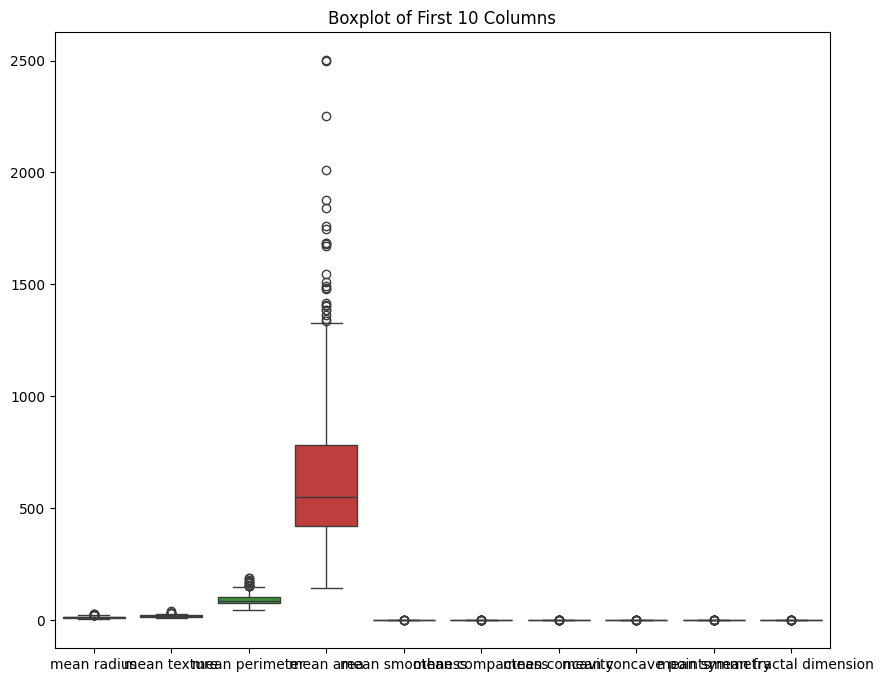

In [2]:
# Import the Breast Cancer Dataset from Sklearn Packages
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Describe all the features from the dictionary, feature names
print("Feature Names: ", data.feature_names)

# Setup the dataframe, describe its details, check for missing values
print("Dataframe Details: \n", df.describe())
print("Missing Values: \n", df.isnull().sum())

# Identify the target class and assign it to the dataframe
X = df.drop('target', axis=1)
y = df['target']

# Perform exploratory analysis of dataframe using seaborn - sns package
plt.figure(figsize=(10, 8))
sns.boxplot(data=X.iloc[:, :10])
plt.title("Boxplot of First 10 Columns")
plt.show()

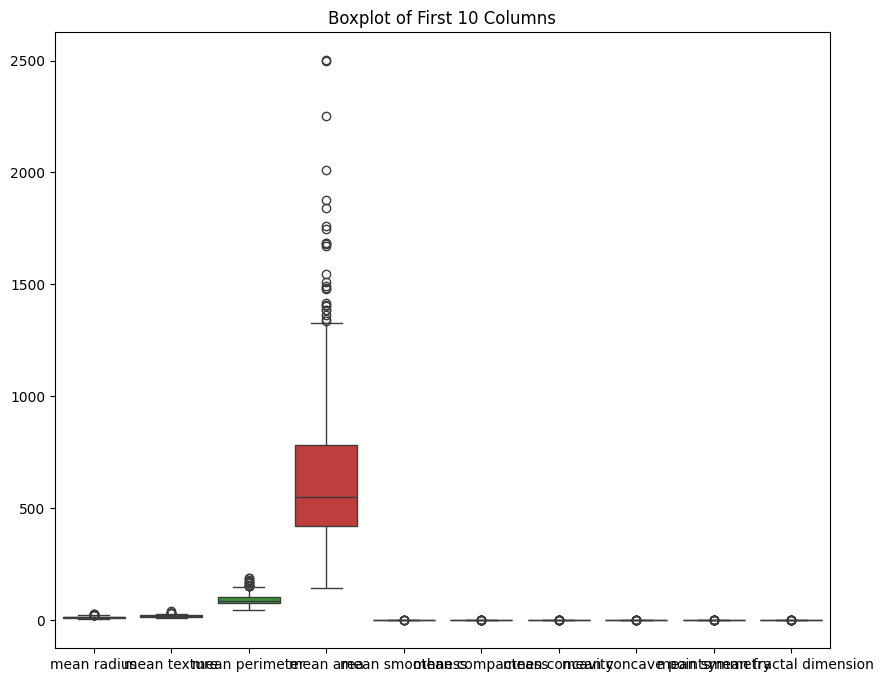

Accuracy:  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix: 
 [[37  6]
 [ 0 71]]
Best Parameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score:  0.9494505494505494
Accuracy (Best Model):  0.9473684210526315
Classification Report (Best Model): 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix (Best Model): 
 [[39  4]
 [ 2 69]]


In [3]:
# Identify the target class and assign it to the dataframe
X = df.drop('target', axis=1)
y = df['target']

# Perform exploratory analysis of dataframe using seaborn - sns package
plt.figure(figsize=(10, 8))
sns.boxplot(data=X.iloc[:, :10])
plt.title("Boxplot of First 10 Columns")
plt.show()

# Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVC using the Train Dataset
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Predict and Analysis the Performance of the SVC Model
y_pred = svm_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Improve the Accuracy of Model using GridSearchCV Model
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy (Best Model): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (Best Model): \n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model): \n", confusion_matrix(y_test, y_pred_best))